## Importing the Libraries

In [68]:
import pandas as pd

### Importing the Dataset

In [69]:
data = pd.read_csv('heart.csv')

### Taking Care of Missing Values

In [70]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Taking Care of Duplicate Values

In [71]:
data_dup = data.duplicated().any()

In [72]:
data_dup

True

In [73]:
data = data.drop_duplicates()

In [74]:
data_dup = data.duplicated().any()

In [75]:
data_dup

False

### Data Processing

In [76]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [77]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [78]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Encoding Categorical Data

In [79]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [80]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [81]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [82]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Feature Scaling

In [83]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [99]:
from sklearn.preprocessing import StandardScaler


In [85]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [86]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Line Chart

In [87]:
age_counts =data['age'].value_counts().sort_index()

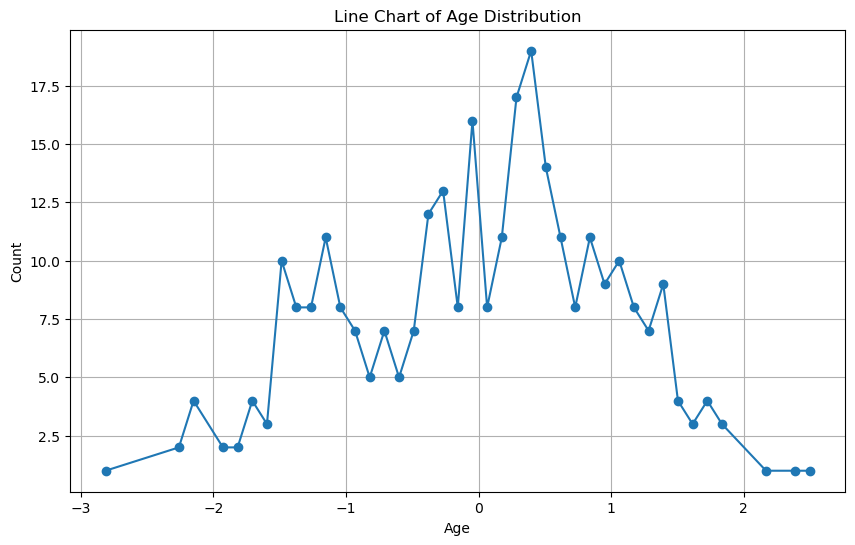

In [88]:
import matplotlib.pyplot as plt

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-')
plt.title('Line Chart of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### scatter plot

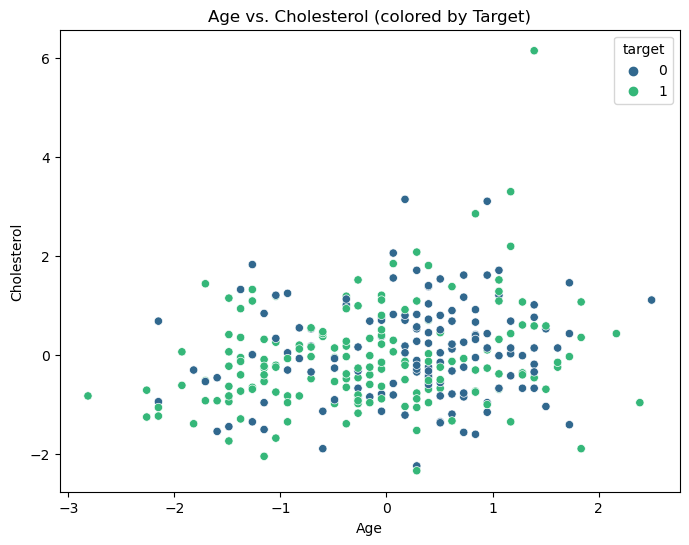

In [89]:
#Scatter plot
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', data=data, hue='target', palette='viridis')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs. Cholesterol (colored by Target)')
plt.show()


### histogram

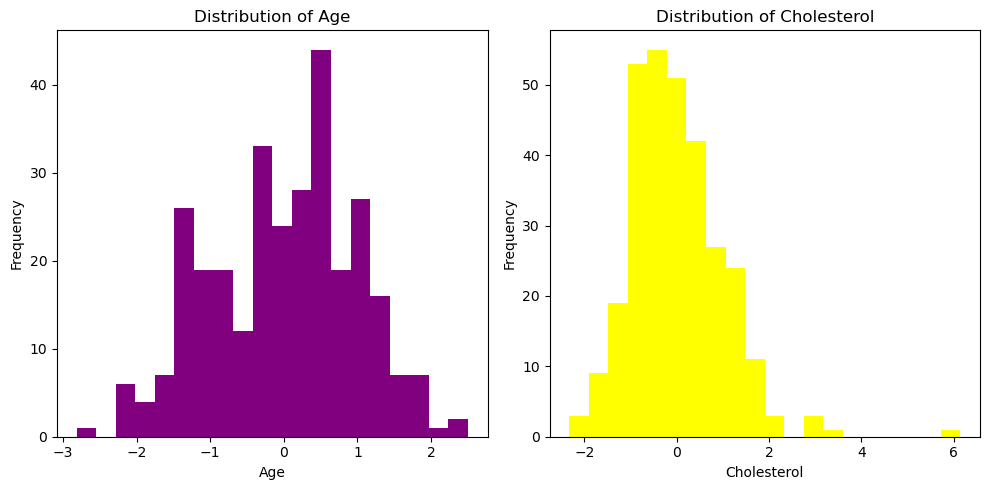

In [90]:
#HISTOGRAM
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['age'], bins=20, color='purple')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
plt.hist(data['chol'], bins=20, color='yellow')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol')

plt.tight_layout()
plt.show()

### Splitting The Dataset Into The Training Set And Test Set

In [91]:
X = data.drop('target',axis=1)

In [92]:
y = data['target']

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [95]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

### Pie chart

In [40]:
heart_disease_counts = data['target'].value_counts()

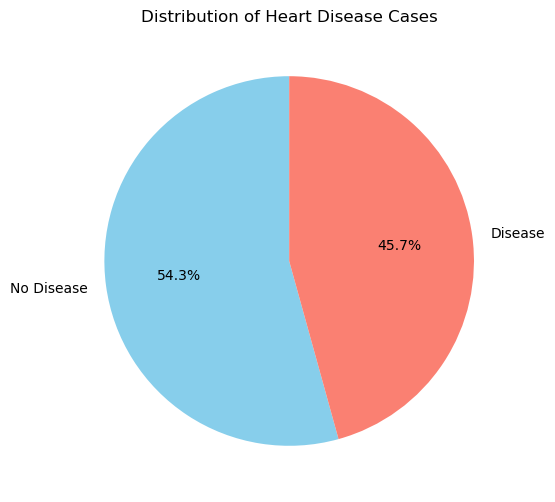

In [41]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(heart_disease_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Distribution of Heart Disease Cases')
plt.show()

### Create count plot

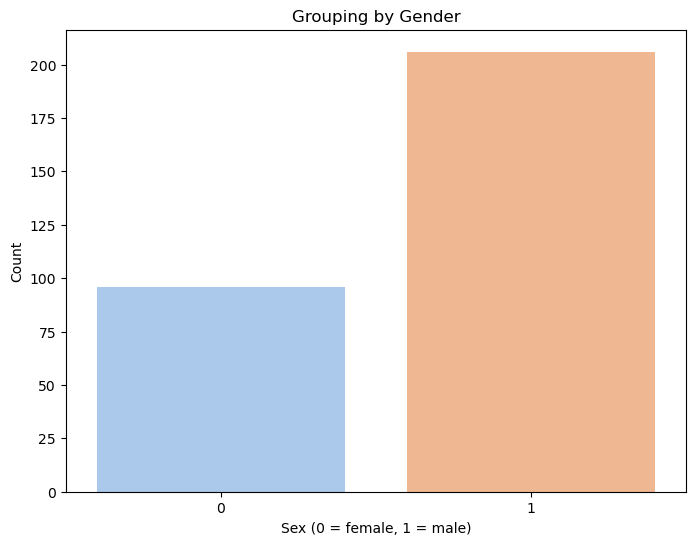

In [42]:

plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=data, palette='pastel')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Count')
plt.title('Grouping by Gender')
plt.show()

### Scatter plot

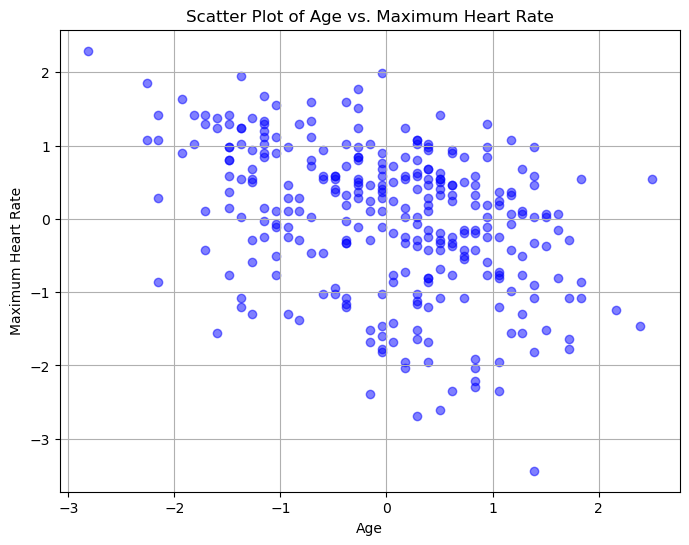

In [43]:
x1=data['age']
y1=data['thalach']
# Plotting the scatter chart
plt.figure(figsize=(8, 6))
plt.scatter(x1,y1,color='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.grid(True)
plt.show()

### Count Plot

<Axes: xlabel='target', ylabel='count'>

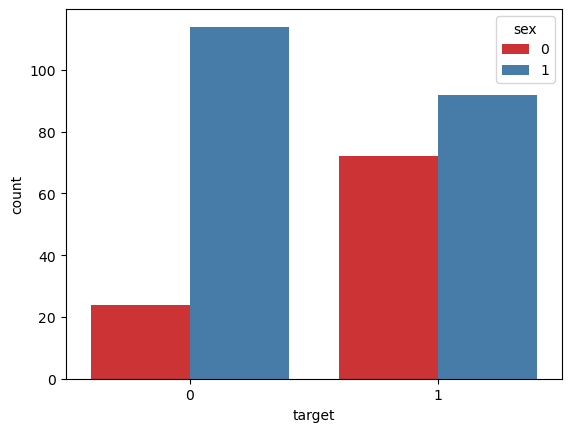

In [44]:
sns.countplot(x='target',hue='sex',data=data,palette='Set1')

### Heat map

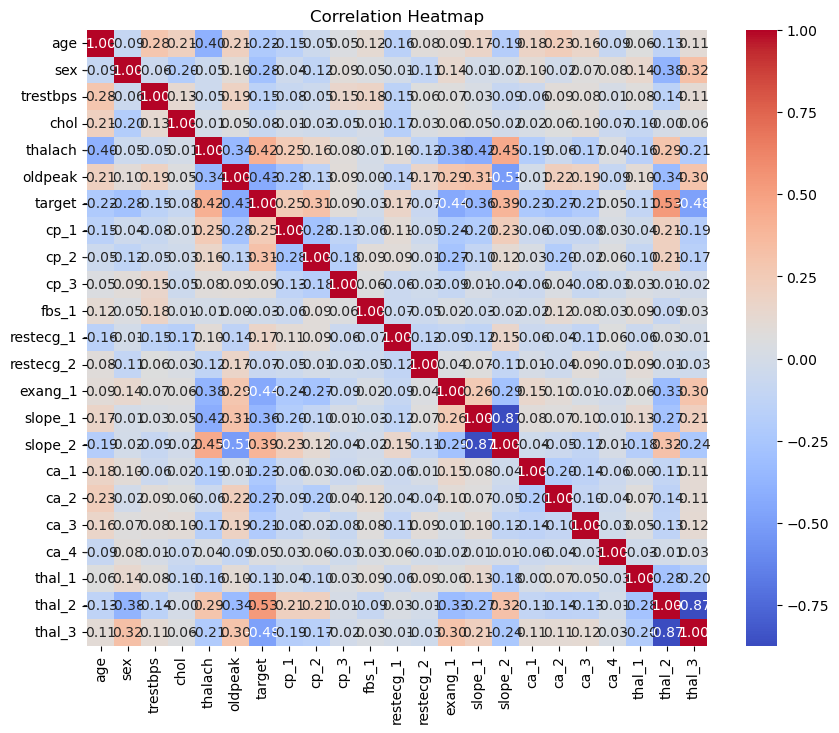

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Logistic Regression

In [46]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred1 = log.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

### SVC

In [52]:
from sklearn import svm

In [53]:
svm = svm.SVC()

In [54]:
svm.fit(X_train,y_train)

SVC()

In [55]:
y_pred2 = svm.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

### KNeighbors Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier()

In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
y_pred3=knn.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [62]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [63]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [43]:
import matplotlib.pyplot as plt

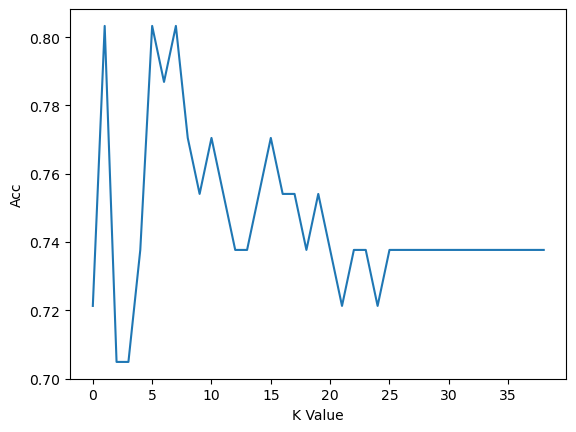

In [44]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [45]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

### Non-Linear ML Algorithms

In [46]:
data = pd.read_csv('heart.csv')

In [47]:
data = data.drop_duplicates()

In [48]:
X = data.drop('target',axis=1)
y=data['target']

In [49]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

 ### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()

In [52]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred4= dt.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred4)

0.7377049180327869

### Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier()

In [57]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
y_pred5= rf.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

### Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gbc = GradientBoostingClassifier()

In [62]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [63]:
y_pred6 = gbc.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [65]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [66]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492
3,DT,73.770492
4,RF,85.245902
5,GB,80.327869


In [67]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

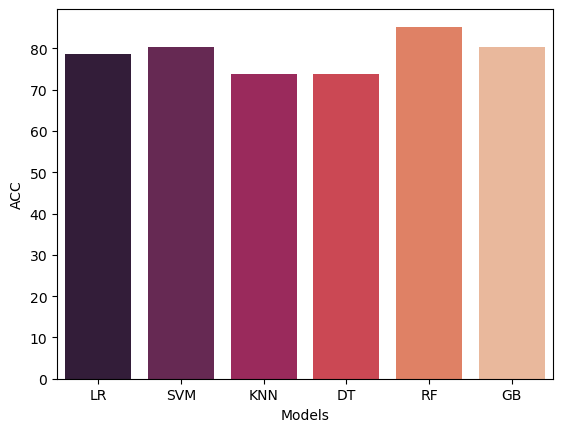

In [71]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'],palette="rocket")

C:\Users\aditi\AppData\Local\Temp\ipykernel_14052\329000050.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=final_data['Models'],y=final_data['ACC'],palette="rocket")


<Axes: xlabel='Models', ylabel='ACC'>

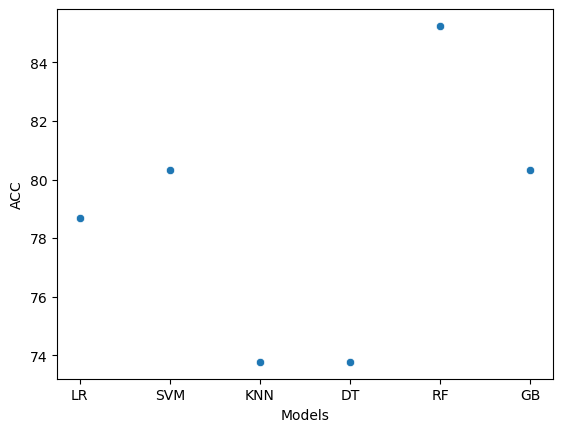

In [88]:
sns.scatterplot(x=final_data['Models'],y=final_data['ACC'],palette="rocket")

In [91]:
# Convert the 'Models' column to a categorical variable with numeric codes
final_data['Models'] = pd.Categorical(final_data['Models']).codes

<Axes: >

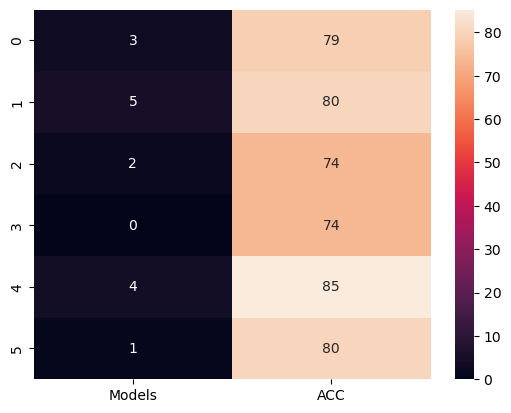

In [92]:
sns.heatmap(final_data,annot=True)

In [72]:
X=data.drop('target',axis=1)
y=data['target']

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

###  Prediction on New Data

In [75]:
import pandas as pd

In [76]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [77]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [78]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


###  Save Model Using Joblib

In [79]:
import joblib

In [80]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [81]:
model = joblib.load('model_joblib_heart')

In [82]:
model.predict(new_data)

array([0], dtype=int64)

In [83]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### GUI

In [84]:
from tkinter import *
import joblib

In [103]:
from tkinter import *

import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())+
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)




Button(master, text='Predict', command=show_entry_fields).grid(row=14, columnspan=2)

mainloop()